In [1]:
import numpy as np
import pandas as pd
import matplotlib as ply


In [2]:
#pd.read_csv??

train = pd.read_csv('dataset/train.csv_VsW9EGx.zip')
test = pd.read_csv('dataset/test.csv_yAFwdy2.zip',compression='infer')
sample = pd.read_csv('dataset/sample_submission_iA3afxn.csv')

In [ ]:
import seaborn as sns
train[train['Gender']=='Male']['Response'].sum()
train[train['Gender']=='Female']['Response'].sum()
col=['Gender','Response']
sns.pairplot(train[col])

In [ ]:
col=train.columns
print(col)
col=[ 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response']

sns.pairplot(train[col])

In [ ]:
import matplotlib.pyplot as plt 
var = 'Vehicle_Age'
data = pd.concat([train['Response'], train[var]], axis=1)
data.plot.scatter(x=var, y='Vehicle_Age', ylim=(0,1));

In [ ]:
train[train['Response']==0]['Vehicle_Age'].unique()

train[train['Response']==1]['Vehicle_Age'].unique()

print(len(train[train['Previously_Insured']==1][train['Response']==0]))
print(len(train[train['Previously_Insured']==1]))
col=['Annual_Premium','Response']
sns.distplot(train[col])

In [3]:
target=train['Response']
train=train.drop(['Response','id'],axis=1)
a={'Male':0,'Female':1}
train['Gender']=train['Gender'].map(a)
a={'> 2 Years':0, '1-2 Year':2, '< 1 Year':1}
train['Vehicle_Age']=train['Vehicle_Age'].map(a)
a={'Yes':1,'No':0}
train['Vehicle_Damage']=train['Vehicle_Damage'].map(a)



a={'Male':0,'Female':1}
test['Gender']=test['Gender'].map(a)
a={'> 2 Years':0, '1-2 Year':2, '< 1 Year':1}
test['Vehicle_Age']=test['Vehicle_Age'].map(a)
a={'Yes':1,'No':0}
test['Vehicle_Damage']=test['Vehicle_Damage'].map(a)

ids=test['id']
test=test.drop(['id'],axis=1)


In [4]:
train['Vintage'][train['Vintage']<150]=1
train['Vintage'][train['Vintage']>=150]=0

/home/noren/anaconda3/envs/my_env/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/noren/anaconda3/envs/my_env/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [5]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

os=RandomOverSampler(0.75)
train_new,target_new=os.fit_sample(train,target)

/home/noren/anaconda3/envs/my_env/lib/python3.7/site-packages/imblearn/utils/_validation.py:638: FutureWarning: Pass sampling_strategy=0.75 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning)


In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(train_new,target_new,test_size=0.2,random_state=3)

In [7]:
import numpy as np
from sklearn.neighbors import LocalOutlierFactor
#x = np.array([[0,0],[0,1],[1,1],[3,0]])
clf = LocalOutlierFactor(n_neighbors=20,algorithm='auto',leaf_size=30,metric='minkowski',p=2,metric_params=None)
y_pred = clf.fit_predict(X_train)
scores = clf.negative_outlier_factor_
print(-scores)

[1.05118462 1.04896431 1.1053934  ... 1.03775514 1.26697214 0.99238331]


In [8]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

#y_pred=clf.predict(X_test)

print(confusion_matrix(y_train,y_pred))
print(accuracy_score(y_train,y_pred))
print(classification_report(y_train,y_pred))

[[     0      0      0]
 [ 16496      0 251090]
 [  8249      0 192323]]
0.41080788964409454


/home/noren/anaconda3/envs/my_env/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/noren/anaconda3/envs/my_env/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         0
           0       0.00      0.00      0.00    267586
           1       0.43      0.96      0.60    200572

    accuracy                           0.41    468158
   macro avg       0.14      0.32      0.20    468158
weighted avg       0.19      0.41      0.26    468158



In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [10]:
y_pred=rfc.predict(X_test)

print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[59085  7728]
 [  633 49594]]
0.9285628844839371
              precision    recall  f1-score   support

           0       0.99      0.88      0.93     66813
           1       0.87      0.99      0.92     50227

    accuracy                           0.93    117040
   macro avg       0.93      0.94      0.93    117040
weighted avg       0.94      0.93      0.93    117040



SMOTETOMEK

In [8]:
from imblearn.combine import SMOTETomek
from collections import Counter

os=SMOTETomek(0.75)
X_train_ns,y_train_ns=os.fit_sample(train,target)
#print("The number of classes before fit {}".format(Counter(y_train)))
#print("The number of classes after fit {}".format(Counter(y_train_ns)))

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_train_ns,y_train_ns,test_size=0.4,random_state=3)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

/home/noren/anaconda3/envs/my_env/lib/python3.7/site-packages/imblearn/utils/_validation.py:638: FutureWarning: Pass sampling_strategy=0.75 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning)


In [9]:
rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)

RandomForestClassifier()

No handles with labels found to put in legend.


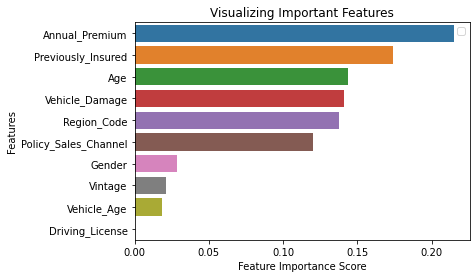

In [10]:
feature_imp = pd.Series(rfc.feature_importances_,index=X_train.columns).sort_values(ascending=False)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [11]:
cols=['Previously_Insured','Vintage','Age','Vehicle_Damage','Annual_Premium','Policy_Sales_Channel','Region_Code','Gender','Vehicle_Age']
X_train=X_train[cols]
rfc1=RandomForestClassifier()
rfc1.fit(X_train,y_train)

RandomForestClassifier()

In [12]:
X_test=X_test[cols]
y_pred=rfc1.predict(X_test)

print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[111192  17668]
 [ 14468  81616]]
0.8571377765132655
              precision    recall  f1-score   support

           0       0.88      0.86      0.87    128860
           1       0.82      0.85      0.84     96084

    accuracy                           0.86    224944
   macro avg       0.85      0.86      0.85    224944
weighted avg       0.86      0.86      0.86    224944



In [13]:
predictions=rfc.predict_proba(test)[:,1]

output = pd.DataFrame({'id': ids, 'Response': predictions})
output.to_csv('my_submission7.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
